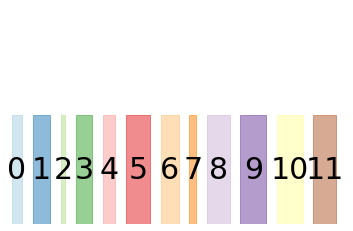

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import random

#create number of blocks with random length
n_blocks = 12
max_length = 60
blocks = [random.uniform(3, 25) for i in range(n_blocks)]
#plot blocks as rectangles with length as width and height as 1
fig, ax = plt.subplots()
x = y = 0
height = 0.5
cmap = cm.Paired
for i, block in enumerate(blocks):
    rect = plt.Rectangle((x, y), block, height, alpha=0.5, color=cmap(i))
    ax.text(x + block / 2, 0.25, f'{i}', horizontalalignment='center', verticalalignment='center',fontsize=30, color='black')
    x += block + 10
    ax.add_patch(rect)

plt.xlim(0, x)
ax.axis('off')
plt.show()

#https://arpitbhayani.me/blogs/genetic-knapsack/


[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
[1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]


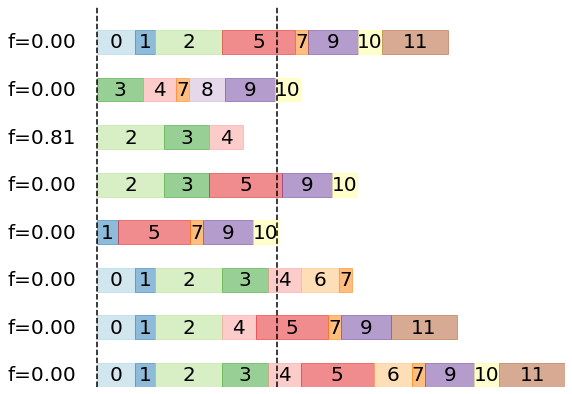

In [3]:
from helper_files import plot_population
import numpy as np

def calc_fitness(individuum):
    length = 0
    for i, chosen in enumerate(individuum):
        if chosen == 1:
            length += blocks[i]
    if length > max_length:
        return 0
    else:
        return length/max_length

def print_population(population):
    for individuum in population:
        print(individuum)


def erzeuge_population(n_individuen):
    population = []
    for i in range(n_individuen):
        individuum = [random.randint(0, 1) for j in range(len(blocks))]
        population.append(individuum)
    return population

population = erzeuge_population(n_individuen=8)
fitness = [calc_fitness(individuum) for individuum in population]

print_population(population)

#plotte population
plot_population(population, blocks, max_length, fitness, with_fitness=True)

fitness_values = []





[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]


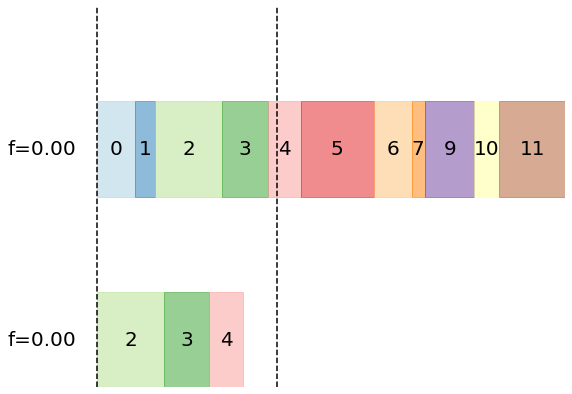

In [4]:
def select_parents(population):
    fitness = [calc_fitness(individuum) for individuum in population]
    #sort by fitness
    population = [x for _, x in sorted(zip(fitness, population), key=lambda pair: pair[0], reverse=True)]

    #choose best 2 parents
    parents = population[:2]

    return parents

parents = select_parents(population)
print_population(parents)
plot_population(parents, blocks, max_length, fitness, with_fitness=True, sort=True)

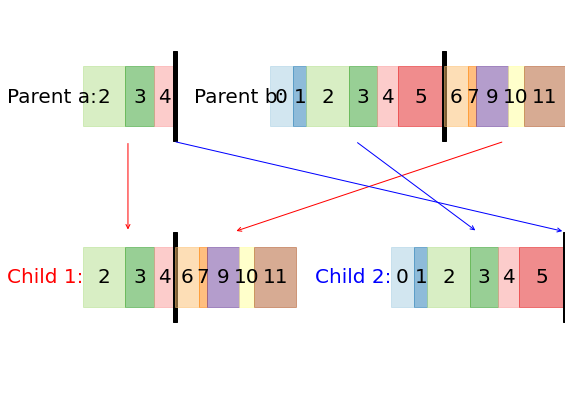

In [5]:
def crossover(parents):
    parent1 = parents[0]
    parent2 = parents[1]

    #choose random crossover point
    crossover_point = random.randint(1, len(parent1)-2)

    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]

    return (child1, child2) , crossover_point

def plot_cross_over(parents, children, crossover_point, with_fitness=True):
    fig, ax = plt.subplots(figsize=(10,7))
    height = 7.5
    cmap = cm.Paired
    y = 0
    xmax = 0
    text_shift = 40
    x_spacing = 10
    x_0 = 0

    arrow_points = []
    x_crossover = -1

    x = x_0
    color_dict = {0: "r", 1: "b"}
    for j, child in enumerate(children):
        ax.text(x , y + height/2, f'Child {j+1}:', horizontalalignment='left', verticalalignment='center',fontsize=20, color=color_dict[j])
        x += text_shift
        x_old = x
        for i, chosen in enumerate(child):
            if i == crossover_point:
                x_ = x-1
                y_ = y-height*0.25
                rect = plt.Rectangle((x_,y_), 2, height*1.5, color='black')
                ax.add_patch(rect)
                x_crossover = x_
                arrow_points.append(((x_crossover-x_old)/2+x_old, y_+height*1.5))

            if chosen == 1:
                rect = plt.Rectangle((x, y), blocks[i], height, alpha=0.5, color=cmap(i))
                ax.text(x + blocks[i] / 2, y + height/2, f'{i}', horizontalalignment='center', verticalalignment='center',fontsize=20, color='black')
                x += blocks[i]
                if x > xmax:
                    xmax = x
                ax.add_patch(rect)

        arrow_points.append(((x_crossover-x)/2+x, y_+height*1.5))
        x += x_spacing


    x = x_0
    y += height*3
    name_dict = {0: "a", 1: "b"}
    for j, parent in enumerate(parents):
        ax.text(x , y + height/2, f'Parent {name_dict[j]}:', horizontalalignment='left', verticalalignment='center',fontsize=20, color='black')
        x += text_shift
        x_old = x
        for i, chosen in enumerate(parent):
            if i == crossover_point:
                x_ = x-1
                y_ = y-height*0.25
                rect = plt.Rectangle((x_,y_), 2, height*1.5, color='black')
                ax.add_patch(rect)
                x_crossover = x_
                arrow_points.append(((x_crossover-x_old)/2+x_old, y_))

            if chosen == 1:
                rect = plt.Rectangle((x, y), blocks[i], height, alpha=0.5, color=cmap(i))
                ax.text(x + blocks[i] / 2, y + height/2, f'{i}', horizontalalignment='center', verticalalignment='center',fontsize=20, color='black')
                x += blocks[i]
                if x > xmax:
                    xmax = x
                ax.add_patch(rect)
        arrow_points.append(((x_crossover-x)/2+x, y_))
        x += x_spacing

    y += height*2

    ax.annotate("", xy=(arrow_points[4][0], arrow_points[4][1]), xytext=(arrow_points[0][0], arrow_points[0][1]),arrowprops=dict(arrowstyle="<-", color=color_dict[0]))
    ax.annotate("", xy=(arrow_points[7][0], arrow_points[7][1]), xytext=(arrow_points[1][0], arrow_points[1][1]),arrowprops=dict(arrowstyle="<-", color=color_dict[0]))
    ax.annotate("", xy=(arrow_points[5][0], arrow_points[5][1]), xytext=(arrow_points[3][0], arrow_points[3][1]),arrowprops=dict(arrowstyle="<-", color=color_dict[1]))
    ax.annotate("", xy=(arrow_points[6][0], arrow_points[6][1]), xytext=(arrow_points[2][0], arrow_points[2][1]),arrowprops=dict(arrowstyle="<-", color=color_dict[1]))


    plt.xlim(0, np.max([max_length+x_0, xmax]))
    plt.ylim(-10, y )
    ax.axis('off')


children, cross_point = crossover(parents)
plot_cross_over(parents, children, cross_point, with_fitness=True)
#print_population(children)
#plot_population(children, blocks, max_length, with_fitness=True)

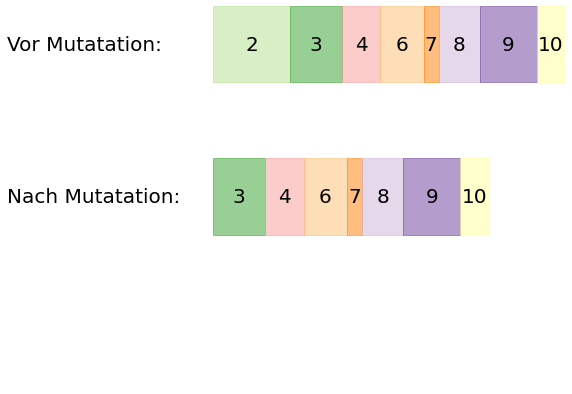

In [9]:
def mutate(individuum, mutation_rate, plot=False):

    if(plot == True):
        fig, ax = plt.subplots(figsize=(10,7))
        x=0
        y=0
        xmax = 0
        text_shift = 60

        ax.text(x , y + height/2, f'Vor Mutatation:', horizontalalignment='left', verticalalignment='center',fontsize=20, color='black')
        x += text_shift
        for i, chosen in enumerate(individuum):
            if chosen == 1:
                rect = plt.Rectangle((x, y), blocks[i], height, alpha=0.5, color=cmap(i))
                ax.text(x + blocks[i] / 2, y + height/2, f'{i}', horizontalalignment='center', verticalalignment='center',fontsize=20, color='black')
                x += blocks[i]
                if x > xmax:
                    xmax = x
                ax.add_patch(rect)


    pos = random.randint(0, len(individuum)-1)
    if random.random() < mutation_rate or True:
        individuum[pos] = 1 - individuum[pos]


    if(plot == True):
        x=0
        y -= height*2
        ax.text(x , y + height/2, f'Nach Mutatation:', horizontalalignment='left', verticalalignment='center',fontsize=20, color='black')
        x += text_shift
        for i, chosen in enumerate(individuum):
            if chosen == 1:
                rect = plt.Rectangle((x, y), blocks[i], height, alpha=0.5, color=cmap(i))
                ax.text(x + blocks[i] / 2, y + height/2, f'{i}', horizontalalignment='center', verticalalignment='center',fontsize=20, color='black')
                x += blocks[i]
                if x > xmax:
                    xmax = x
                ax.add_patch(rect)
        #"""
        y -= height*2

        plt.xlim(0, xmax)
        plt.ylim(y, height)
        ax.axis('off')
        plt.show()


    return individuum




mutation_rate = 0.3
mutated = mutate(children[0], mutation_rate, plot = True)
#mutated = [mutate(individuum, mutation_rate) for individuum in children]
#print_population(mutated)
#plot_population(mutated, blocks, max_length, with_fitness=True)


[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]


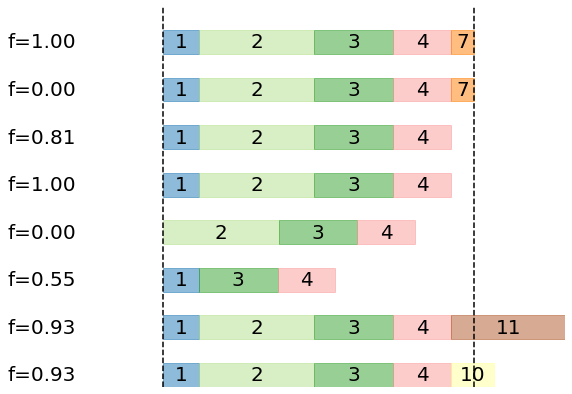

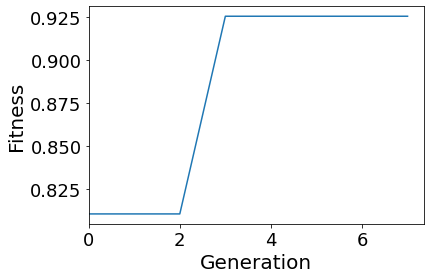

In [16]:


def next_generation(population):
    fitness = [calc_fitness(individuum) for individuum in population]
    fitness_values.append(np.max(fitness))
    parents = select_parents(population)

    next_generation = parents
    for i in range(0, int((len(population)-len(parents))/2)):
        children, _ = crossover(parents)
        mutated_children = [mutate(child, mutation_rate, plot = False) for child in children]
        next_generation += mutated_children

    return next_generation

population = next_generation(population)
fitness = [calc_fitness(individuum) for individuum in population]
print_population(population)
plot_population(population, blocks, max_length, fitness, with_fitness=True, sort=True)

#create new figure
fig, ax = plt.subplots()

ax.plot(fitness_values)
ax.set_xlabel('Generation', fontsize=20)
ax.set_ylabel('Fitness', fontsize=20)
ax.set_xlim(0,None)
plt.tick_params(axis='both', which='major', labelsize=18)  #
